In [1]:
import sqlite3
import pandas as pd
import json

from IPython.display import HTML, display
from PIL import Image

from db import *
import torax_detection

run_observations()

df = create_dataset()
display(df.head(5))

✅ Each study_id has exactly one file_name.
Is study_id unique in df_study_patient_data? True
Is study_id unique in df_study_instances (after grouping)? True
Is study_id unique in df_study_report (after grouping)? True
N study_id without respective instance_id: 221
N file_name that doesn't exist: 327
Available body_parts
{'THORAX', 'TORAX', 'SHOULDER', 'TORAX TORAX PA', 'SPINE LUMBAR', 'L SPINE', 'ABDOMEN', 'CHEST', 'TÓRAX', 'COLUMNA COLUMNA-L/S LATERAL', 'COLUMNA', 'TORAX TORAX LATERAL', 'ANGIO', 'Senos Paranasales', 'PELVIS', 'COLUMNA COLUMNA-L/S AP', 'PNS', 'BREAST', 'L/S-SPINE', 'COL. LUMBAR', 'OTHER', 'L-SPINE', 'DEFAULT', 'HEAD', 'LSPINE', 'CSPINE', 'NECK', 'Pectoral'}


,study_id,body_parts,modalities,patient_age,patient_gender,file_name,instance_measurement_data,instance_ids,report_ids,report_values


In [ ]:
torax_detection.train_torax_classifier()

In [3]:
images_to_test_classifier = ["data/test_classifier/a.jpg",
                             "data/test_classifier/b.jpeg",
                             "data/test_classifier/c.jpg",
                             "data/test_classifier/d.jpg",
                             "data/test_classifier/e.jpeg"]

model = torax_detection.load_model("models/torax_detector_model.pth")

for image_file in images_to_test_classifier:
    image = Image.open(image_file).convert("RGB")
    display(image)
    print(torax_detection.predict_image(image_file, model))


Using MPS on Apple Silicon
Using MPS on Apple Silicon
('torax', 0.8443351984024048)
Using MPS on Apple Silicon
('not_torax', 7.010894933046075e-06)
Using MPS on Apple Silicon
('not_torax', 0.0018772020703181624)
Using MPS on Apple Silicon
('not_torax', 7.72917628637515e-05)
Using MPS on Apple Silicon
('not_torax', 4.680602069129236e-05)


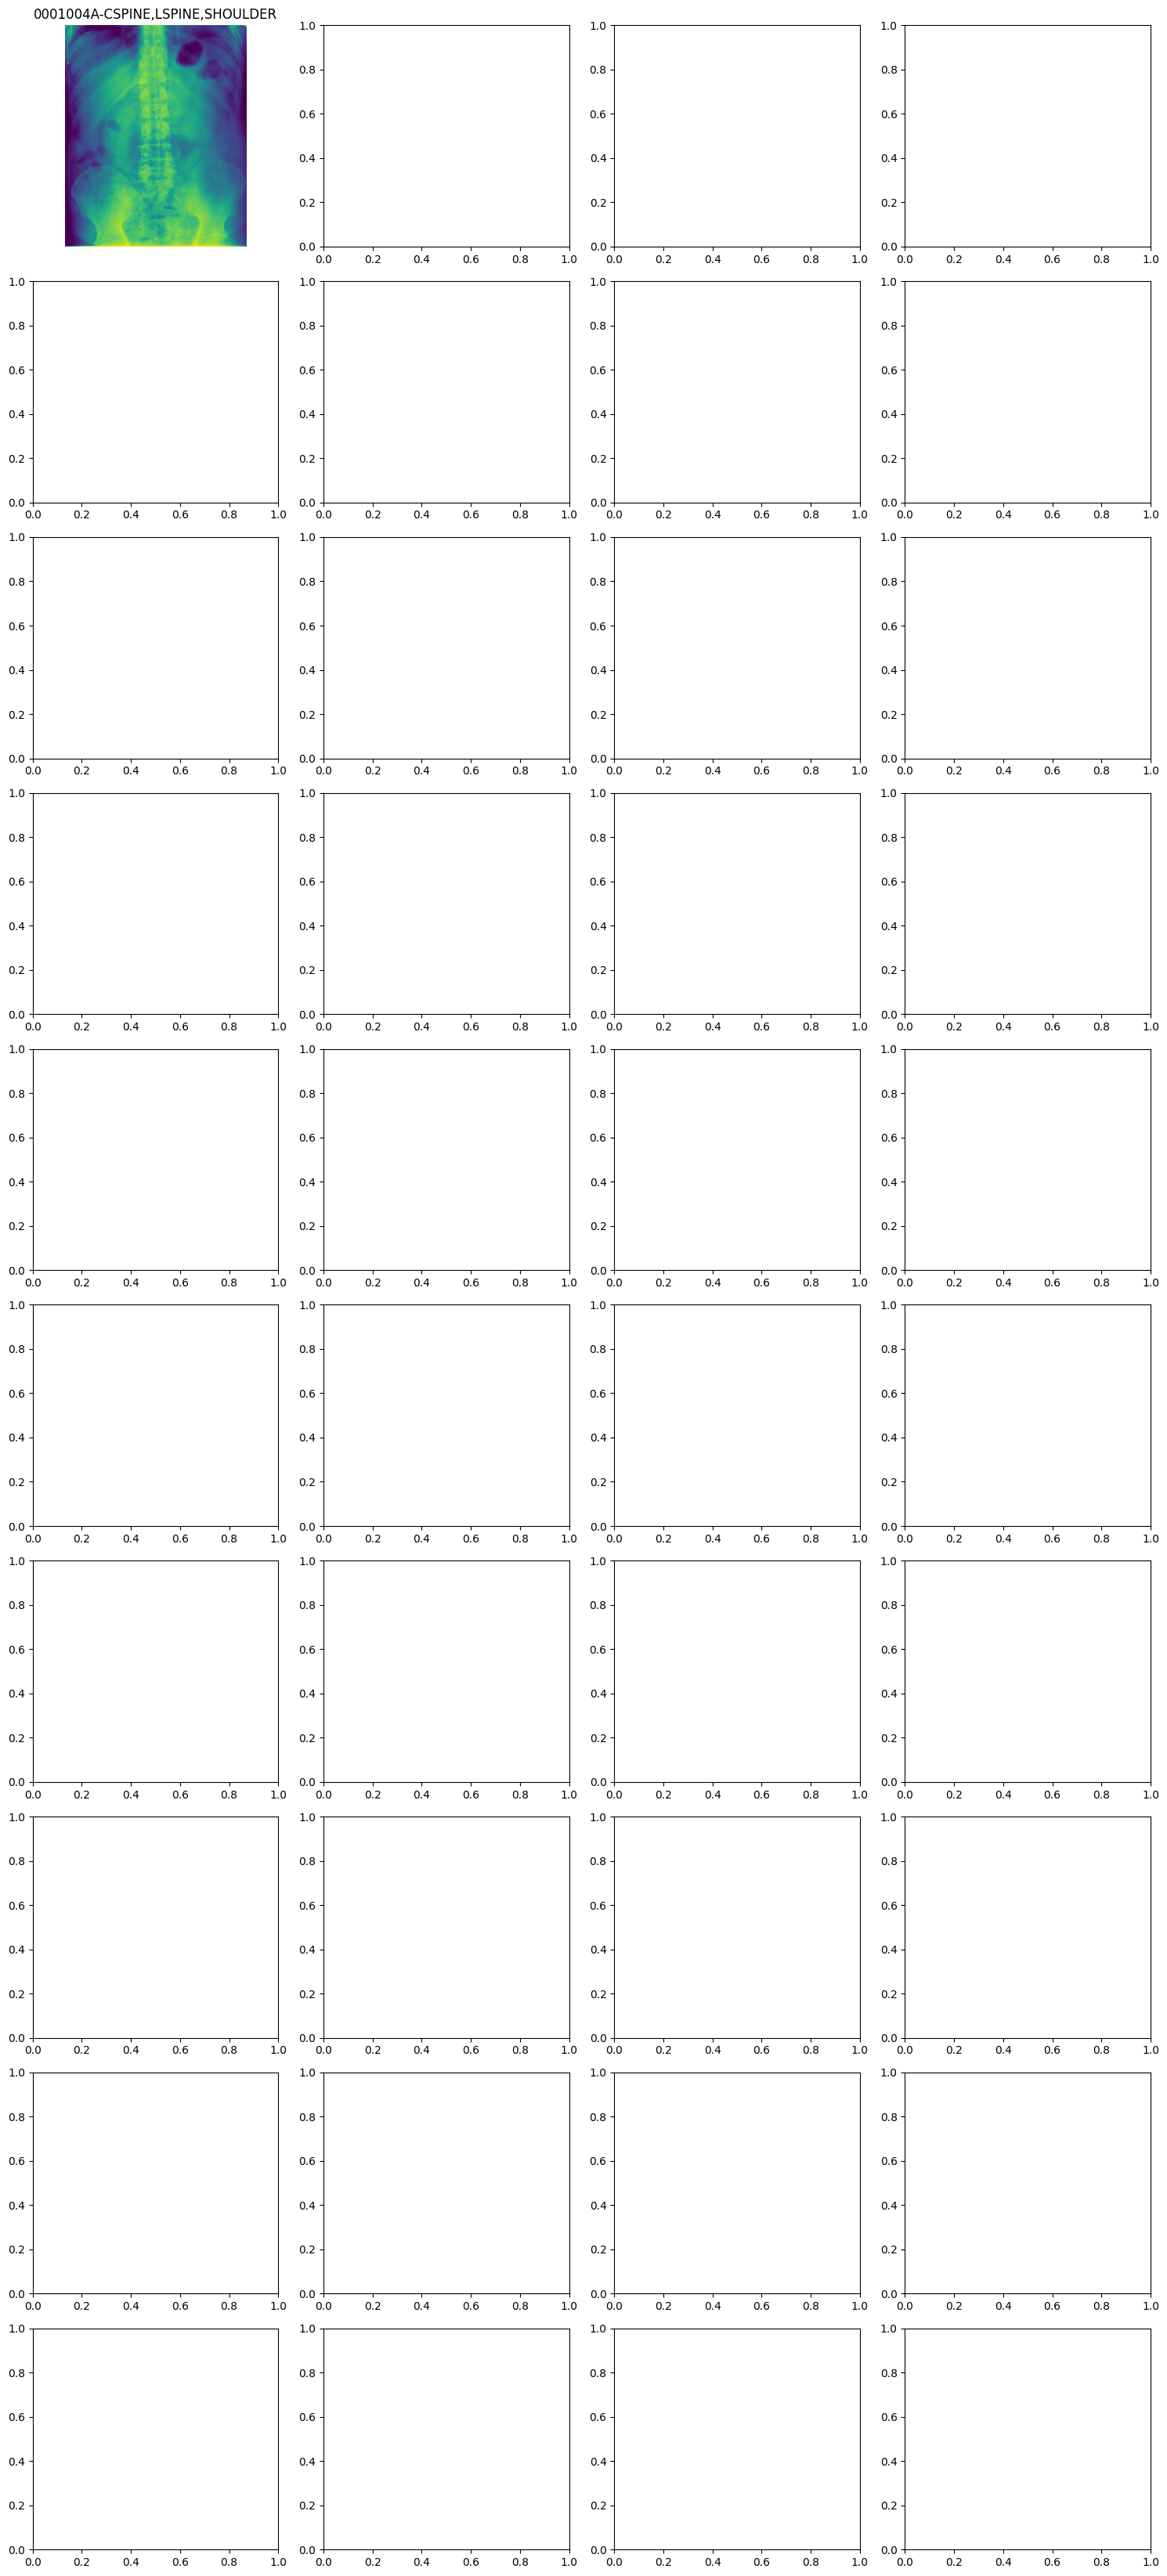

In [159]:
df=df[df.body_parts.apply(lambda x : 'CHEST' in x and 'SPINE' in x)]
df=df[df.body_parts.apply(lambda x : 'CSPINE' in x)]

plot_images(df,10,4)

In [2]:
df

NameError: name 'df' is not defined

In [16]:
df.iloc[60].instance_measurement_data

[[{'ctr': 37.84,
   'uuid': 'a89aa6b8-a378-4d9f-bed2-9155644654f9',
   'value': '37.84%',
   'active': True,
   'handles': {'end': {'x': 2087.1816939890714,
     'y': 1977.3551912568307,
     'active': False,
     'moving': False,
     'highlight': True},
    'end2': {'x': 279.7554644808745,
     'y': 2197.4904371584703,
     'active': True,
     'moving': False,
     'highlight': True,
     'drawnIndependently': False},
    'start': {'x': 1191.1926229508197,
     'y': 1981.2172131147543,
     'active': False,
     'highlight': True},
    'start2': {'x': 2647.174863387978,
     'y': 2158.870218579235,
     'active': False,
     'highlight': True,
     'drawnIndependently': False},
    'textBox': {'x': 2667.174863387978,
     'y': 2068.1127049180327,
     'active': False,
     'hasMoved': False,
     'boundingBox': {'top': 523,
      'left': 1175.178634594977,
      'width': 54.59088134765625,
      'height': 25},
     'hasBoundingBox': True,
     'drawnIndependently': True,
     'moves

In [15]:
display(HTML(df.iloc[60].report_values[0]))